In [1]:
import pandas as pd
%matplotlib inline
import re

In [2]:
refugees_df = pd.read_csv("unhcr_popstats_export_time_series_2017_08_24_222329 - unhcr_popstats_export_time_series_2017_08_24_222329.csv", error_bad_lines=False)

In [3]:
refugees_df = refugees_df[refugees_df["Origin"] != "Various/Unknown"]

In [4]:
refugees_df["Value"] = refugees_df["Value"].str.replace("*", "0")

In [5]:
refugees_df["Value"] = refugees_df["Value"].astype(int)

In [6]:
refugees_count_year = refugees_df.groupby(["Year", "Origin"])["Value"].sum().reset_index()

In [7]:
refugees_count_year.to_csv("refugees_count_year.csv")

In [8]:
refugees_count_year_top15 = refugees_count_year[refugees_count_year["Origin"].isin(["Syrian Arab Rep.", "Afghanistan", "Sudan", "Dem. Rep. of the Congo", "Somalia", "Central African Rep.", "Myanmar", "Eritrea", "Burundi", "Viet Nam", "Iraq","Colombia", "Rwanda", "Ukraine", "Nigeria"])]


In [53]:
refugees_count_year_2016_top15 = refugees_count_year_top15[refugees_count_year_top15["Year"] == 2016]

In [ ]:
refugees_count_year_2016_top15

In [55]:
refugees_count_year_2016_top15.drop("Year", 1, inplace = True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
refugees_count_year_2016_top15.columns = ["Origin", "Value_2016"]

In [60]:
refugees_count_year_top15 = refugees_count_year_top15.merge(refugees_count_year_2016_top15, left_on="Origin", right_on = "Origin", how = "left") 

In [63]:
refugees_count_year_top15.replace({'Origin' : {"Syrian Arab Rep.": "Syria", "Viet Nam": "Vietnam", "Dem. Rep. of the Congo": "Dem. Rep. Congo", "Central African Rep.": "Central African Republic"}}, inplace=True)   


In [73]:
refugees_count_year_top15.sort_values(["Value_2016", "Year"], ascending = False, inplace = True)

In [74]:
refugees_count_year_top15

,Year,Origin,Value,Value_2016
611,2016,Syria,5524333,5524333
596,2015,Syria,4873243,5524333
581,2014,Syria,3887491,5524333
566,2013,Syria,2468332,5524333
551,2012,Syria,729022,5524333
536,2011,Syria,19931,5524333
521,2010,Syria,18452,5524333
506,2009,Syria,17914,5524333
491,2008,Syria,15211,5524333
476,2007,Syria,13690,5524333


In [75]:
refugees_count_year_top15.to_csv("refugees_count_year_top15.csv")

In [11]:
refugees_count_year_top15["Origin"].value_counts()

Rwanda                    56
Sudan                     54
Dem. Rep. of the Congo    53
Viet Nam                  49
Burundi                   47
Somalia                   42
Iraq                      41
Syrian Arab Rep.          40
Afghanistan               38
Eritrea                   38
Nigeria                   34
Colombia                  34
Central African Rep.      32
Myanmar                   31
Ukraine                   25
Name: Origin, dtype: int64

In [12]:
refugees_count_year.groupby("Origin")["Value"].sum().sort_values()

Origin
Saint-Pierre-et-Miquelon                         0
British Virgin Islands                           0
Micronesia (Federated States of)                 0
Liechtenstein                                    0
Aruba                                            0
Wallis and Futuna Islands                        0
Svalbard and Jan Mayen                           0
Guadeloupe                                       0
American Samoa                                   0
Holy See (the)                                   2
Norfolk Island                                   2
French Polynesia                                 2
Anguilla                                         2
Martinique                                       3
Palau                                            6
Vanuatu                                          6
Bermuda                                          7
Cook Islands                                     7
Luxembourg                                      11
Marshall Islands        

In [13]:
refugees_count_year

,Year,Origin,Value
0,1960,Angola,150000
1,1961,Angola,150000
2,1961,Ghana,5000
3,1961,Rwanda,147000
4,1962,Angola,170000
5,1962,Ghana,5000
6,1962,Rwanda,147000
7,1963,Angola,175000
8,1963,Ghana,5000
9,1963,Guinea-Bissau,6000


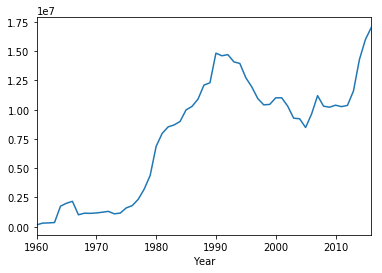

In [14]:
refugees_count_year.groupby("Year")["Value"].sum().plot()

In [15]:
refugees_df_2016 = refugees_df[refugees_df["Year"] == 2016]

In [16]:
# refugees_df_2016 = refugees_df_2016[refugees_df_2016["Value"] != "0"]

In [17]:
refugees_df_2016.columns = ["Year", "Country_Residence", "Origin", "Type", "Count"]

In [18]:
refugees_df_2016["Count"] = refugees_df_2016["Count"].astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
refugees_df_2016.groupby("Country_Residence")["Count"].sum().reset_index().sort_values(by = "Count", ascending = False)

,Country_Residence,Count
166,Turkey,2869379
122,Pakistan,1352551
91,Lebanon,1012954
78,Iran (Islamic Rep. of),979435
169,Uganda,940815
57,Ethiopia,791616
85,Jordan,685178
64,Germany,648498
48,Dem. Rep. of the Congo,451947
87,Kenya,451077


In [20]:
countries = pd.read_csv("countries.csv", encoding='latin-1')

In [21]:
countries

,Country,Latitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [22]:
refugees_df_2016

,Year,Country_Residence,Origin,Type,Count
95662,2016,Aruba,Colombia,Refugees (incl. refugee-like situations),0
95663,2016,Aruba,Cuba,Refugees (incl. refugee-like situations),0
95664,2016,Aruba,Venezuela (Bolivarian Republic of),Refugees (incl. refugee-like situations),0
95665,2016,Afghanistan,Afghanistan,Refugees (incl. refugee-like situations),0
95666,2016,Afghanistan,Iran (Islamic Rep. of),Refugees (incl. refugee-like situations),33
95667,2016,Afghanistan,Iraq,Refugees (incl. refugee-like situations),0
95668,2016,Afghanistan,Kyrgyzstan,Refugees (incl. refugee-like situations),0
95669,2016,Afghanistan,Pakistan,Refugees (incl. refugee-like situations),59737
95670,2016,Afghanistan,Tajikistan,Refugees (incl. refugee-like situations),0
95671,2016,Afghanistan,Uzbekistan,Refugees (incl. refugee-like situations),0


In [23]:
refugees_df_2016["Country_Residence"].value_counts()

United States of America            186
Canada                              179
United Kingdom                      168
Germany                             166
Australia                           151
Sweden                              145
France                              143
Brazil                              134
Italy                               133
Switzerland                         131
Austria                             123
Belgium                             122
Netherlands                         118
Ireland                             111
Norway                              109
Argentina                           105
South Africa                        104
Finland                             100
Spain                                99
Greece                               97
Denmark                              84
Rep. of Korea                        84
Ukraine                              82
Turkey                               80
Luxembourg                           76


In [24]:
pd.set_option("display.max_rows", 250)

In [25]:
refugees_df_2016.replace({'Country_Residence' : {"United States of America": "United States", "Czech Rep.": "Czech Republic", "Rep. of Korea": "South Korea", "Iran (Islamic Rep. of)": "Iran", "Central African Rep.": "Central African Republic", "Syrian Arab Rep.": "Syria","Dem. Rep. of the Congo": "Congo [DRC]", "Central African Rep.": "Central African Republic", "Venezuela (Bolivarian Republic of)": "Venezuela", "Serbia and Kosovo (S/RES/1244 (1999))": "Serbia", "Côte d'Ivoire": "Cte d'Ivoire", "Bolivia (Plurinational State of)": "Bolivia", "China, Hong Kong SAR": "China", "Iran (Islamic Rep. of)": "Iran", "United Rep. of Tanzania": "Tanzania", "Dominican Rep.": "Dominican Republic", "The former Yugoslav Republic of Macedonia": "Macedonia [FYROM]", "Palestinian": "Palestinian Territories", "Russian Federation": "Russia", "Myanmar": "Myanmar [Burma]", "Viet Nam": "Vietnam", "South Sudan": "Sudan", "Rep. of Moldova": "Moldova", "Congo": "Congo [Republic]"}}, inplace=True)   


/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [26]:
refugees_df_2016_merged = refugees_df_2016.merge(countries, left_on = "Country_Residence", right_on = "Name", how = "left")


In [27]:
refugees_df_2016_merged.drop("Country",1,inplace=True)
refugees_df_2016_merged.drop("Name",1,inplace=True)


In [28]:
refugees_df_2016_merged.replace({'Origin' : {"United States of America": "United States", "Czech Rep.": "Czech Republic", "Rep. of Korea": "South Korea", "Iran (Islamic Rep. of)": "Iran", "Central African Rep.": "Central African Republic", "Syrian Arab Rep.": "Syria","Dem. Rep. of the Congo": "Congo [DRC]", "Central African Rep.": "Central African Republic", "Venezuela (Bolivarian Republic of)": "Venezuela", "Serbia and Kosovo (S/RES/1244 (1999))": "Serbia", "Côte d'Ivoire": "Cte d'Ivoire", "Bolivia (Plurinational State of)": "Bolivia", "China, Hong Kong SAR": "China", "Iran (Islamic Rep. of)": "Iran", "United Rep. of Tanzania": "Tanzania", "Dominican Rep.": "Dominican Republic", "The former Yugoslav Republic of Macedonia": "Macedonia [FYROM]", "Dem. People's Rep. of Korea": "North Korea", "Lao People's Dem. Rep.": "Laos", "Palestinian" : "Palestinian Territories", "Russian Federation": "Russia", "Myanmar Myanmar [Burma]": "Myanmar [Burma]", "Viet Nam": "Vietnam", "South Sudan": "Sudan", "Rep. of Moldova": "Moldova", "Congo": "Congo [Republic]"}}, inplace=True)   


In [29]:
refugees_df_2016_merged.columns = ["Year", "Country_Residence", "Origin", "Type", "Count", "Lat_Residence", "Lon_Residence"]

In [30]:
refugees_df_2016_merged

,Year,Country_Residence,Origin,Type,Count,Lat_Residence,Lon_Residence
0,2016,Aruba,Colombia,Refugees (incl. refugee-like situations),0,12.521110,-69.968338
1,2016,Aruba,Cuba,Refugees (incl. refugee-like situations),0,12.521110,-69.968338
2,2016,Aruba,Venezuela,Refugees (incl. refugee-like situations),0,12.521110,-69.968338
3,2016,Afghanistan,Afghanistan,Refugees (incl. refugee-like situations),0,33.939110,67.709953
4,2016,Afghanistan,Iran,Refugees (incl. refugee-like situations),33,33.939110,67.709953
5,2016,Afghanistan,Iraq,Refugees (incl. refugee-like situations),0,33.939110,67.709953
6,2016,Afghanistan,Kyrgyzstan,Refugees (incl. refugee-like situations),0,33.939110,67.709953
7,2016,Afghanistan,Pakistan,Refugees (incl. refugee-like situations),59737,33.939110,67.709953
8,2016,Afghanistan,Tajikistan,Refugees (incl. refugee-like situations),0,33.939110,67.709953
9,2016,Afghanistan,Uzbekistan,Refugees (incl. refugee-like situations),0,33.939110,67.709953


In [31]:
refugees_df_2016.shape

(6768, 5)

In [32]:
refugees_df_2016_merged_2 = refugees_df_2016_merged.merge(countries, left_on = "Origin", right_on = "Name", how = "left")

In [33]:
refugees_df_2016_merged_2.shape

(6768, 11)

In [34]:
refugees_df_2016_merged_2.drop("Country", 1, inplace =True)
refugees_df_2016_merged_2.drop("Name", 1, inplace =True)


In [35]:
refugees_df_2016_merged_2.columns = ["Year", "Country_Residence", "Origin", "Type", "Count", "Lat_Residence", "Lon_Residence", "Lat_Origin", "Lon_Origin"]



In [36]:
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Cte d'Ivoire", "Lat_Origin"] = 7.539989 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Cte d'Ivoire", "Lon_Origin"] = -5.547080 




In [37]:
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Myanmar", "Lat_Origin"] = 21.913965 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Myanmar", "Lon_Origin"] = 95.956223 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Tibetan", "Lat_Origin"] = 29.652491 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Tibetan", "Lon_Origin"] = 91.172112 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Curaçao", "Lat_Origin"] = 12.169570 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Origin"] == "Curaçao", "Lon_Origin"] = -68.990021



In [38]:
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Country_Residence"] == "Cte d'Ivoire", "Lat_Residence"] = 7.539989 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Country_Residence"] == "Cte d'Ivoire", "Lon_Residence"] = -5.547080 


In [39]:
refugees_df_2016_merged_2 = refugees_df_2016_merged_2[refugees_df_2016_merged_2["Origin"] != "Stateless"]

In [40]:
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Country_Residence"] == "Curaçao", "Lat_Residence"] = 12.169570 
refugees_df_2016_merged_2.loc[refugees_df_2016_merged_2["Country_Residence"] == "Curaçao", "Lon_Residence"] = -68.990021


In [41]:
refugees_df_2016_merged_2.dropna(inplace = True)

In [42]:
refugees_df_2016_merged_2.to_csv("Refugees_true_2016.csv")

In [43]:
refugees_df_2016_merged_2

,Year,Country_Residence,Origin,Type,Count,Lat_Residence,Lon_Residence,Lat_Origin,Lon_Origin
0,2016,Aruba,Colombia,Refugees (incl. refugee-like situations),0,12.521110,-69.968338,4.570868,-74.297333
1,2016,Aruba,Cuba,Refugees (incl. refugee-like situations),0,12.521110,-69.968338,21.521757,-77.781167
2,2016,Aruba,Venezuela,Refugees (incl. refugee-like situations),0,12.521110,-69.968338,6.423750,-66.589730
3,2016,Afghanistan,Afghanistan,Refugees (incl. refugee-like situations),0,33.939110,67.709953,33.939110,67.709953
4,2016,Afghanistan,Iran,Refugees (incl. refugee-like situations),33,33.939110,67.709953,32.427908,53.688046
5,2016,Afghanistan,Iraq,Refugees (incl. refugee-like situations),0,33.939110,67.709953,33.223191,43.679291
6,2016,Afghanistan,Kyrgyzstan,Refugees (incl. refugee-like situations),0,33.939110,67.709953,41.204380,74.766098
7,2016,Afghanistan,Pakistan,Refugees (incl. refugee-like situations),59737,33.939110,67.709953,30.375321,69.345116
8,2016,Afghanistan,Tajikistan,Refugees (incl. refugee-like situations),0,33.939110,67.709953,38.861034,71.276093
9,2016,Afghanistan,Uzbekistan,Refugees (incl. refugee-like situations),0,33.939110,67.709953,41.377491,64.585262


In [44]:
refugees_df_2016_merged_2.groupby("Country_Residence")["Count"].sum().reset_index().sort_values(by = "Count")


,Country_Residence,Count
132,Saint Lucia,0
137,Seychelles,0
139,Singapore,0
120,Palau,0
63,Grenada,0
148,Suriname,0
156,Timor-Leste,0
68,Haiti,0
18,Belize,0
108,Myanmar [Burma],0


In [45]:
refugees_count_top15 = refugees_df_2016_merged_2.groupby("Origin")["Count"].sum().reset_index().sort_values(by = "Count").tail(15)




In [78]:
refugees_count_top15.to_csv("refugees_2016_count_top15.csv")

In [76]:
refugees_count_top15.replace({'Origin' : {"Congo [DRC]": "Dem. Rep. Congo"}}, inplace=True)   


In [77]:
refugees_count_top15

,Origin,Count
128,Nigeria,229261
187,Ukraine,239048
147,Rwanda,286033
38,Colombia,311051
84,Iraq,315998
195,Vietnam,329331
29,Burundi,408036
58,Eritrea,459390
121,Myanmar,490265
34,Central African Republic,490869


In [48]:
Syria_2016 = refugees_df_2016_merged_2[refugees_df_2016_merged_2["Origin"] == "Syria"]

In [49]:
Syria_2016.to_csv("Syria_2016_True.csv")

In [50]:
Syria_2016.sort_values(by = "Count", inplace = True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
Syria_2016.tail(25).to_csv("Syria_2016_top25.csv")

In [52]:
Syria_2016

,Year,Country_Residence,Origin,Type,Count,Lat_Residence,Lon_Residence,Lat_Origin,Lon_Origin
46,2016,Anguilla,Syria,Refugees (incl. refugee-like situations),0,18.220554,-63.068615,34.802075,38.996815
1646,2016,Cayman Islands,Syria,Refugees (incl. refugee-like situations),0,19.513469,-80.566956,34.802075,38.996815
2068,2016,Dominican Republic,Syria,Refugees (incl. refugee-like situations),0,18.735693,-70.162651,34.802075,38.996815
2096,2016,Algeria,Syria,Refugees (incl. refugee-like situations),0,28.033886,1.659626,34.802075,38.996815
2604,2016,Gabon,Syria,Refugees (incl. refugee-like situations),0,-0.803689,11.609444,34.802075,38.996815
2883,2016,Guinea-Bissau,Syria,Refugees (incl. refugee-like situations),0,11.803749,-15.180413,34.802075,38.996815
2982,2016,Grenada,Syria,Refugees (incl. refugee-like situations),0,12.262776,-61.604171,34.802075,38.996815
3454,2016,Israel,Syria,Refugees (incl. refugee-like situations),0,31.046051,34.851612,34.802075,38.996815
3597,2016,Jamaica,Syria,Refugees (incl. refugee-like situations),0,18.109581,-77.297508,34.802075,38.996815
3714,2016,Kenya,Syria,Refugees (incl. refugee-like situations),0,-0.023559,37.906193,34.802075,38.996815
